# Training of the models

In this notebook we train **MobileNet, MobileNetV2** and **ResNet50** using both ordinary MSE and MSE that takes into account only the points that are actually visible on the image. At the end we plot the training and validation loss for each model and save trained models 

In [1]:
import tensorflow as tf
from Models.mobilenet_v2 import MobileNetV2Tuned
from Models.mobilenet import MobileNetTuned
from Models.resnet_50 import ResNetTuned
from Data.data_generator import DataGenerator
from keras.optimizers import Adam

import matplotlib.pyplot as plt

## Load data

Data is loaded through special data generators

In [2]:
batch_size = 32

train_generator = DataGenerator(data_path="Data/train", batch_size=batch_size, shuffle=True)
val_generator = DataGenerator(data_path="Data/val", batch_size=batch_size, shuffle=False)

## MobileNet

### Train with ordinary MSE

In [3]:
epochs = 50

# Setup the learning rate decay (learning rate is 0.001 for first 10 epochs, then becomes 0.0001 for next 20 epochs and then becomes 0.00001)
lr_steps = [5*len(train_generator), 20*len(train_generator)]
lr_values = [0.001, 1e-4, 1e-5]
lr_scheduler = tf.keras.optimizers.schedules.PiecewiseConstantDecay(lr_steps, lr_values)

optimizer = Adam(learning_rate=lr_scheduler)

In [4]:
model = MobileNetTuned()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.cast (TFOpLambda)        (None, 224, 224, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 mobilenet_1.00_224 (Functio  (None, 1024)             3228864   
 nal)                                                            
                                                             

In [5]:
train_history = model.train(train_generator, val_generator, epochs=epochs, optimizer=optimizer, loss="mse")

Epoch 1/50
250/250 [==============================] - ETA: 0s - loss: 1962.5736
Epoch 1: val_loss improved from inf to 390.98093, saving model to Models/Checkpoints\mobilenet.hdf5
250/250 [==============================] - 86s 321ms/step - loss: 1962.5736 - val_loss: 390.9809
Epoch 2/50
250/250 [==============================] - ETA: 0s - loss: 231.4623
Epoch 2: val_loss improved from 390.98093 to 200.63403, saving model to Models/Checkpoints\mobilenet.hdf5
250/250 [==============================] - 79s 315ms/step - loss: 231.4623 - val_loss: 200.6340
Epoch 3/50
250/250 [==============================] - ETA: 0s - loss: 116.8290
Epoch 3: val_loss improved from 200.63403 to 133.81087, saving model to Models/Checkpoints\mobilenet.hdf5
250/250 [==============================] - 79s 314ms/step - loss: 116.8290 - val_loss: 133.8109
Epoch 4/50
250/250 [==============================] - ETA: 0s - loss: 69.5462
Epoch 4: val_loss improved from 133.81087 to 77.50078, saving model to Models/Check

In [6]:
# Load the checkpoint that represents the weights with the lower validation loss during the training and save the model
model.load_checkpoint()
model.save_model("mobilenet_mse.h5")

Saved trained model at Models/Trained/mobilenet_mse.h5 


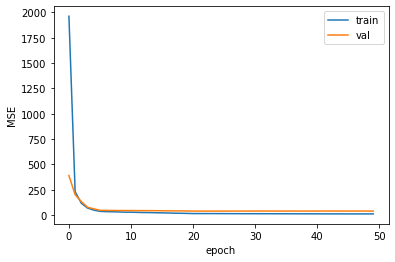

In [7]:
# Plot the training and validation loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

plt.savefig('mobilenet_mse.png')
plt.show()

### Train with convolution instead of pooling

In [3]:
epochs = 50

# Setup the learning rate decay (learning rate is 0.001 for first 10 epochs, then becomes 0.0001 for next 20 epochs and then becomes 0.00001)
lr_steps = [5*len(train_generator), 20*len(train_generator)]
lr_values = [0.001, 1e-4, 1e-5]
lr_scheduler = tf.keras.optimizers.schedules.PiecewiseConstantDecay(lr_steps, lr_values)

optimizer = Adam(learning_rate=lr_scheduler)

In [4]:
model = MobileNetTuned(pooling=False)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.cast (TFOpLambda)        (None, 224, 224, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                             

In [5]:
train_history = model.train(train_generator, val_generator, epochs=epochs, optimizer=optimizer, loss="mse")

Epoch 1/50
250/250 [==============================] - ETA: 0s - loss: 720.8063
Epoch 1: val_loss improved from inf to 668.65094, saving model to Models/Checkpoints\mobilenet.hdf5
250/250 [==============================] - 119s 452ms/step - loss: 720.8063 - val_loss: 668.6509
Epoch 2/50
250/250 [==============================] - ETA: 0s - loss: 137.3650
Epoch 2: val_loss improved from 668.65094 to 193.95782, saving model to Models/Checkpoints\mobilenet.hdf5
250/250 [==============================] - 113s 453ms/step - loss: 137.3650 - val_loss: 193.9578
Epoch 3/50
250/250 [==============================] - ETA: 0s - loss: 72.2769
Epoch 3: val_loss improved from 193.95782 to 139.99429, saving model to Models/Checkpoints\mobilenet.hdf5
250/250 [==============================] - 100s 402ms/step - loss: 72.2769 - val_loss: 139.9943
Epoch 4/50
250/250 [==============================] - ETA: 0s - loss: 45.2125
Epoch 4: val_loss improved from 139.99429 to 81.58851, saving model to Models/Checkp

In [6]:
# Load the checkpoint that represents the weights with the lower validation loss during the training and save the model
model.load_checkpoint()
model.save_model("mobilenet_conv.h5")

Saved trained model at Models/Trained/mobilenet_conv.h5 


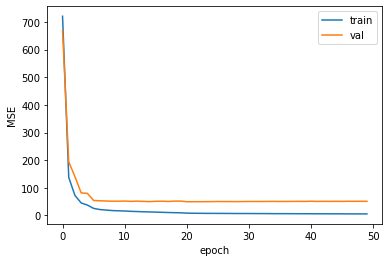

In [7]:
# Plot the training and validation loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

plt.savefig('mobilenet_conv.png')
plt.show()

### Train with modified MSE

In [3]:
epochs = 50

# Setup the learning rate decay (learning rate is 0.001 for first 10 epochs, then becomes 0.0001 for next 20 epochs and then becomes 0.00001)
lr_steps = [5*len(train_generator), 20*len(train_generator)]
lr_values = [0.001, 1e-4, 1e-5]
lr_scheduler = tf.keras.optimizers.schedules.PiecewiseConstantDecay(lr_steps, lr_values)

optimizer = Adam(learning_rate=lr_scheduler)

In [4]:
model = MobileNetTuned()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.cast (TFOpLambda)        (None, 224, 224, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 mobilenet_1.00_224 (Functio  (None, 1024)             3228864   
 nal)                                                            
                                                             

In [5]:
train_history = model.train(train_generator, val_generator, epochs=epochs, optimizer=optimizer)

Epoch 1/50
250/250 [==============================] - ETA: 0s - loss: 1842.1045
Epoch 1: val_loss improved from inf to 425.77466, saving model to Models/Checkpoints\mobilenet.hdf5
250/250 [==============================] - 89s 332ms/step - loss: 1842.1045 - val_loss: 425.7747
Epoch 2/50
250/250 [==============================] - ETA: 0s - loss: 220.0544
Epoch 2: val_loss improved from 425.77466 to 178.60577, saving model to Models/Checkpoints\mobilenet.hdf5
250/250 [==============================] - 84s 336ms/step - loss: 220.0544 - val_loss: 178.6058
Epoch 3/50
250/250 [==============================] - ETA: 0s - loss: 108.1631
Epoch 3: val_loss improved from 178.60577 to 89.02098, saving model to Models/Checkpoints\mobilenet.hdf5
250/250 [==============================] - 83s 332ms/step - loss: 108.1631 - val_loss: 89.0210
Epoch 4/50
250/250 [==============================] - ETA: 0s - loss: 65.7556
Epoch 4: val_loss improved from 89.02098 to 74.36864, saving model to Models/Checkpoi

In [7]:
# Load the checkpoint that represents the weights with the lower validation loss during the training and save the model
model.load_checkpoint()
#model.save_model("mobilenet_custom.h5")

ValueError: Unknown loss function: mse_visible. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

In [ ]:
# Plot the training and validation loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

plt.savefig('mobilenet_custom.png')
plt.show()

## MobileNetV2

### Train with ordinary MSE

In [3]:
epochs = 50

# Setup the learning rate decay (learning rate is 0.001 for first 10 epochs, then becomes 0.0001 for next 20 epochs and then becomes 0.00001)
lr_steps = [10*len(train_generator), 30*len(train_generator)]
lr_values = [0.001, 1e-4, 1e-5]
lr_scheduler = tf.keras.optimizers.schedules.PiecewiseConstantDecay(lr_steps, lr_values)

optimizer = Adam(learning_rate=lr_scheduler)

In [4]:
model = MobileNetV2Tuned()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.cast (TFOpLambda)        (None, 224, 224, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 1280)             2257984   
 ional)                                                          
                                                             

In [5]:
train_history = model.train(train_generator, val_generator, epochs=epochs, optimizer=optimizer, loss="mse")

Epoch 1/50
250/250 [==============================] - ETA: 0s - loss: 2618.8438
Epoch 1: val_loss improved from inf to 3401.76416, saving model to Models/Checkpoints\mobilenetV2.hdf5
250/250 [==============================] - 119s 440ms/step - loss: 2618.8438 - val_loss: 3401.7642
Epoch 2/50
250/250 [==============================] - ETA: 0s - loss: 521.4677
Epoch 2: val_loss improved from 3401.76416 to 1543.04456, saving model to Models/Checkpoints\mobilenetV2.hdf5
250/250 [==============================] - 107s 427ms/step - loss: 521.4677 - val_loss: 1543.0446
Epoch 3/50
250/250 [==============================] - ETA: 0s - loss: 226.8395
Epoch 3: val_loss improved from 1543.04456 to 347.09503, saving model to Models/Checkpoints\mobilenetV2.hdf5
250/250 [==============================] - 108s 433ms/step - loss: 226.8395 - val_loss: 347.0950
Epoch 4/50
250/250 [==============================] - ETA: 0s - loss: 175.7278
Epoch 4: val_loss did not improve from 347.09503
250/250 [=========

In [6]:
# Load the checkpoint that represents the weights with the lower validation loss during the training and save the model
model.load_checkpoint()
model.save_model("mobilenet_v2_mse.h5")

Saved trained model at Models/Trained/mobilenet_v2_mse.h5 


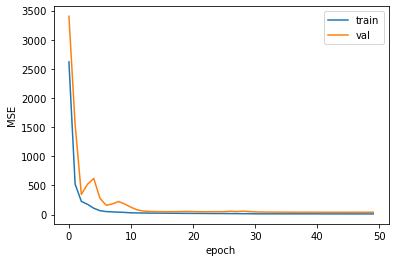

In [7]:
# Plot the training and validation loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

plt.savefig('mobilenet_v2_mse.png')
plt.show()

### Train with modified MSE

In [3]:
epochs = 50

# Setup the learning rate decay (learning rate is 0.001 for first 10 epochs, then becomes 0.0001 for next 20 epochs and then becomes 0.00001)
lr_steps = [5*len(train_generator), 20*len(train_generator)]
lr_values = [0.001, 1e-4, 1e-5]
lr_scheduler = tf.keras.optimizers.schedules.PiecewiseConstantDecay(lr_steps, lr_values)

optimizer = Adam(learning_rate=lr_scheduler)

In [4]:
model = MobileNetV2Tuned()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.cast (TFOpLambda)        (None, 224, 224, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 1280)             2257984   
 ional)                                                          
                                                             

In [5]:
train_history = model.train(train_generator, val_generator, epochs=epochs, optimizer=optimizer)

Epoch 1/50
250/250 [==============================] - ETA: 0s - loss: 2376.7219
Epoch 1: val_loss improved from inf to 7009.29443, saving model to Models/Checkpoints\mobilenetV2.hdf5
250/250 [==============================] - 218s 805ms/step - loss: 2376.7219 - val_loss: 7009.2944
Epoch 2/50
250/250 [==============================] - ETA: 0s - loss: 436.3803
Epoch 2: val_loss improved from 7009.29443 to 614.29340, saving model to Models/Checkpoints\mobilenetV2.hdf5
250/250 [==============================] - 123s 492ms/step - loss: 436.3803 - val_loss: 614.2934
Epoch 3/50
250/250 [==============================] - ETA: 0s - loss: 202.6281
Epoch 3: val_loss improved from 614.29340 to 401.21704, saving model to Models/Checkpoints\mobilenetV2.hdf5
250/250 [==============================] - 120s 481ms/step - loss: 202.6281 - val_loss: 401.2170
Epoch 4/50
250/250 [==============================] - ETA: 0s - loss: 134.0261
Epoch 4: val_loss improved from 401.21704 to 255.53561, saving model t

In [6]:
# Load the checkpoint that represents the weights with the lower validation loss during the training and save the model
model.load_checkpoint()
model.save_model("mobilenet_v2_custom.h5")

Saved trained model at Models/Trained/mobilenet_v2_custom.h5 


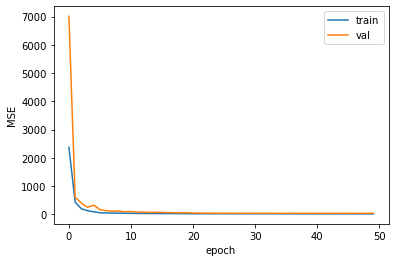

In [7]:
# Plot the training and validation loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

plt.savefig('mobilenet_v2_custom.png')
plt.show()

### ResNet

ResNet needs a different batch size as the GPU runs out of memory otherwise

In [2]:
batch_size = 8

train_generator = DataGenerator(data_path="Data/train", batch_size=batch_size, shuffle=True)
val_generator = DataGenerator(data_path="Data/val", batch_size=batch_size, shuffle=False)

In [4]:
epochs = 30

# Setup the learning rate decay (learning rate is 0.0001 for first 10 epochs, then becomes 0.00001 for next 20 epochs)
lr_steps = [10*len(train_generator)]
lr_values = [1e-4, 1e-5]
lr_scheduler = tf.keras.optimizers.schedules.PiecewiseConstantDecay(lr_steps, lr_values)

optimizer = Adam(learning_rate=lr_scheduler)

In [5]:
model = ResNetTuned()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.cast (TFOpLambda)        (None, 224, 224, 3)       0         
                                                                 
 tf.__operators__.getitem (S  (None, 224, 224, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 224, 224, 3)      0         
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 18)                36882     
                                                             

In [ ]:
train_history = model.train(train_generator, val_generator, epochs=epochs, optimizer=optimizer, loss="mse")

Epoch 1/30
1000/1000 [==============================] - ETA: 0s - loss: 1798.4141
Epoch 1: val_loss improved from inf to 811.87598, saving model to Models/Checkpoints\resnet50.hdf5
1000/1000 [==============================] - 207s 196ms/step - loss: 1798.4141 - val_loss: 811.8760
Epoch 2/30
1000/1000 [==============================] - ETA: 0s - loss: 247.9547
Epoch 2: val_loss improved from 811.87598 to 218.33086, saving model to Models/Checkpoints\resnet50.hdf5
1000/1000 [==============================] - 195s 195ms/step - loss: 247.9547 - val_loss: 218.3309
Epoch 3/30
1000/1000 [==============================] - ETA: 0s - loss: 130.2859
Epoch 3: val_loss did not improve from 218.33086
1000/1000 [==============================] - 191s 191ms/step - loss: 130.2859 - val_loss: 287.8131
Epoch 4/30
1000/1000 [==============================] - ETA: 0s - loss: 99.3253
Epoch 4: val_loss improved from 218.33086 to 119.70675, saving model to Models/Checkpoints\resnet50.hdf5
1000/1000 [=========

In [ ]:
# Load the checkpoint that represents the weights with the lower validation loss during the training and save the model
model.load_checkpoint()
model.save_model("resnet.h5")

In [ ]:
# Plot the training and validation loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

plt.savefig('resnet.png')
plt.show()